In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras import optimizers

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Major-project-8th-sem/Huge-titanic-dataset.csv')

X = data[['PassengerId']]
y = data['Survived']

X = X.values
y = y.values

from sklearn.model_selection import train_test_split
X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
#MSE
def MSE(y_true, y_pred):
    return tf.reduce_mean(tf.math.square(y_true - y_pred))

#BCE
def BCE(y_true, y_pred):
    return -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))

#AnyLoss-Accuracy
def Ours_Accu(y_true, y_pred):
    y_pred = 1 / (1 + tf.math.exp(-L * (y_pred - 0.5)))
    yl = y_train.shape[0]
    accu = (yl - tf.reduce_sum(y_true) - tf.reduce_sum(y_pred) + 2 * tf.reduce_sum(y_true * y_pred)) / yl
    return 1 - accu

#AnyLoss-Fbeta
def Ours_Fbeta(y_true, y_pred):
    beta = 1
    y_pred = 1 / (1 + tf.math.exp(-L * (y_pred - 0.5)))
    numerator = (1 + beta**2) * tf.reduce_sum(y_true * y_pred)
    denominator = (beta**2) * tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return 1 - (numerator / denominator)

#AnyLoss-Gmean
def Ours_Gmean(y_true, y_pred):
    y_pred = 1 / (1 + tf.math.exp(-L * (y_pred - 0.5)))
    syhy = tf.reduce_sum(y_true * y_pred)
    sy = tf.reduce_sum(y_true)
    yl = y_train.shape[0]
    gmean = tf.sqrt(syhy * (yl - tf.reduce_sum(y_pred) - sy + syhy) / (sy * (yl - sy)))
    return 1 - gmean

#AnyLoss-Balanced-Accuracy
def Ours_BAccu(y_true, y_pred):
    y_pred = 1 / (1 + tf.math.exp(-L * (y_pred - 0.5)))
    syhy = tf.reduce_sum(y_true * y_pred)
    sy = tf.reduce_sum(y_true)
    yl = y_train.shape[0]
    baccu = (yl * (syhy + sy) - sy * (tf.reduce_sum(y_pred) + sy)) / (2 * sy * (yl - sy))
    return 1 - baccu

In [4]:
hidden_node = 2
kernel_initializer = keras.initializers.he_normal(seed=100)
activation = 'sigmoid'
learning_rate = 0.001
batch_size = int(X.shape[0] * 0.9 * 0.05)
epochs = 100
L = 73
threshold = 0.5

In [6]:
# Building the Model
model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# Compile the Model
opt = optimizers.Adam(learning_rate=learning_rate)
model.compile(loss=MSE, optimizer=opt, metrics=['accuracy'])  # You can replace MSE with any custom loss

In [8]:
# Training the Model
history = model.fit(X_train_a, y_train, validation_data=(X_test_a, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
# Making Predictions
result = model.predict(X_test_a)
predicted = [1 if r > threshold else 0 for r in result]
# Compute Accuracy
def compute_test_accuracy(y_test, predicted):
    correct = np.sum(y_test == predicted)
    return correct / len(y_test)

accuracy = compute_test_accuracy(y_test, predicted)
print(f"Test Accuracy with AnyLoss: {accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Test Accuracy with AnyLoss: 0.5952


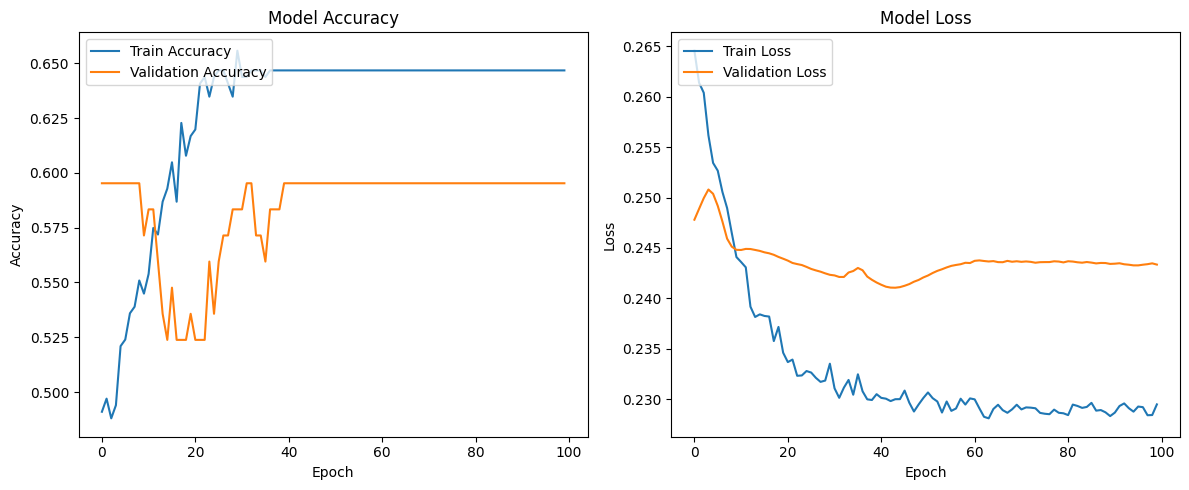

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

plot_training_history(history)